In [2]:
import pandas as pd
import scipy
import yfinance as yf
from matplotlib import pyplot as plt
import seaborn as sns

In [1]:
BASE_PATH = "/mnt/c/Users/Ethan/Desktop/stock_info/indexes"

In [4]:
symbols_df = pd.read_csv(f'{BASE_PATH}/sp500.csv')[['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry']]

In [5]:
symbols_df

,Symbol,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ACN,Accenture,Information Technology,IT Consulting & Other Services
...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment
501,ZION,Zions Bancorporation,Financials,Regional Banks


In [10]:
msft = yf.Ticker("MSFT")
msft.history(period="10y").reset_index()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-08-12 00:00:00-04:00,27.049425,27.474418,27.049425,27.391085,25493700,0.00,0.0
1,2013-08-13 00:00:00-04:00,27.281991,27.315560,27.030236,27.047020,39464100,0.23,0.0
2,2013-08-14 00:00:00-04:00,26.971490,27.995300,26.602248,27.147718,48519600,0.00,0.0
3,2013-08-15 00:00:00-04:00,26.854001,27.005055,25.880544,26.677773,33338000,0.00,0.0
4,2013-08-16 00:00:00-04:00,26.677776,26.845613,26.568681,26.686167,32866300,0.00,0.0
...,...,...,...,...,...,...,...,...
2513,2023-08-07 00:00:00-04:00,328.369995,331.109985,327.519989,330.109985,17741500,0.00,0.0
2514,2023-08-08 00:00:00-04:00,326.959991,328.750000,323.000000,326.049988,22327600,0.00,0.0
2515,2023-08-09 00:00:00-04:00,326.470001,327.109985,321.049988,322.230011,22373300,0.00,0.0
2516,2023-08-10 00:00:00-04:00,326.019989,328.260010,321.179993,322.929993,20113700,0.00,0.0


In [26]:
all_stock_data_df = pd.DataFrame()

for _,row in symbols_df.iterrows():
    ticker = yf.Ticker(row['Symbol'])
    history_df = ticker.history(period="10y").reset_index()
    history_df['Symbol'] = row['Symbol']
    history_df['Pct Change'] = history_df['Close'].pct_change()
    all_stock_data_df = pd.concat([all_stock_data_df, history_df])

all_stock_data_df

BRK.B: No data found, symbol may be delisted
BF.B: No price data found, symbol may be delisted (period=10y)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Pct Change,Adj Close
0,2013-08-12 00:00:00-04:00,86.814728,87.373876,86.608728,87.094299,1647400.0,0.0,0.0,MMM,NaN,NaN
1,2013-08-13 00:00:00-04:00,87.197312,87.682888,86.218811,87.307671,2023300.0,0.0,0.0,MMM,0.002450,NaN
2,2013-08-14 00:00:00-04:00,87.476905,87.484264,86.498399,86.535187,2021400.0,0.0,0.0,MMM,-0.008848,NaN
3,2013-08-15 00:00:00-04:00,86.020174,86.020174,85.078456,85.232956,1994900.0,0.0,0.0,MMM,-0.015049,NaN
4,2013-08-16 00:00:00-04:00,85.107863,85.497793,85.078434,85.269722,2332800.0,0.0,0.0,MMM,0.000431,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2513,2023-08-07 00:00:00-04:00,180.190002,181.880005,180.029999,180.690002,1941700.0,0.0,0.0,ZTS,0.011532,NaN
2514,2023-08-08 00:00:00-04:00,182.149994,190.539993,177.250000,189.300003,4118000.0,0.0,0.0,ZTS,0.047651,NaN
2515,2023-08-09 00:00:00-04:00,189.940002,190.949997,186.970001,189.350006,2270000.0,0.0,0.0,ZTS,0.000264,NaN
2516,2023-08-10 00:00:00-04:00,190.000000,191.830002,187.729996,189.100006,2348500.0,0.0,0.0,ZTS,-0.001320,NaN


In [32]:
ticker = yf.Ticker('SPY')
spy_df = ticker.history(period="10y").reset_index()
spy_df['Symbol'] = 'SPY'
spy_df['Pct Change'] = history_df['Close'].pct_change()
spy_df = spy_df.set_index('Date')
spy_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Symbol,Pct Change
Date,,,,,,,,,,
2013-08-12 00:00:00-04:00,140.220062,140.927563,140.153471,140.761093,68593300,0.0,0.0,0.0,SPY,NaN
2013-08-13 00:00:00-04:00,141.010806,141.418657,140.178442,141.177277,80806000,0.0,0.0,0.0,SPY,0.003956
2013-08-14 00:00:00-04:00,141.110687,141.335429,140.419823,140.453125,79829200,0.0,0.0,0.0,SPY,-0.010181
2013-08-15 00:00:00-04:00,139.346058,139.362696,138.247331,138.488724,152931800,0.0,0.0,0.0,SPY,-0.003981
2013-08-16 00:00:00-04:00,138.222370,138.696823,137.756248,138.030930,130868200,0.0,0.0,0.0,SPY,-0.000666
...,...,...,...,...,...,...,...,...,...,...
2023-08-07 00:00:00-04:00,448.709991,450.869995,447.989990,450.709991,58357500,0.0,0.0,0.0,SPY,0.011532
2023-08-08 00:00:00-04:00,448.079987,450.700012,445.269989,448.750000,71361300,0.0,0.0,0.0,SPY,0.047651
2023-08-09 00:00:00-04:00,449.029999,449.200012,444.959991,445.750000,78789600,0.0,0.0,0.0,SPY,0.000264


Text(0.5, 1.0, 'y = 0.006669 + -0.329x')

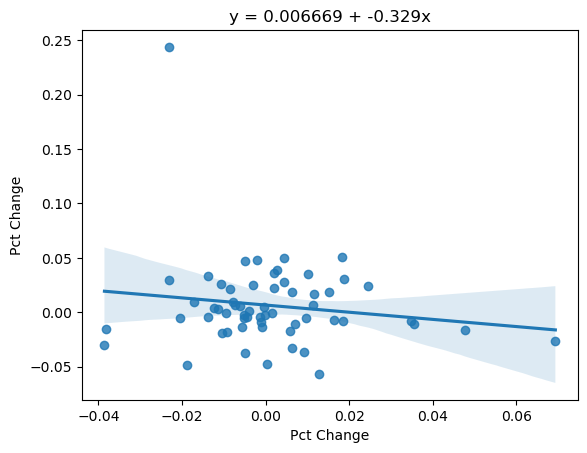

In [91]:
p = sns.regplot(x=spy_df['Pct Change'].tail(60), y=all_stock_data_df.loc[all_stock_data_df['Symbol'] == 'NVDA']['Pct Change'].tail(60))
#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

#add regression equation to plot
plt.title('y = ' + str(round(intercept,6)) + ' + ' + str(round(slope,3)) + 'x')

In [84]:
res = all_stock_data_df.groupby('Symbol').apply(lambda x: scipy.stats.linregress(spy_df['Pct Change'].tail(len(x) - 1).tail(50).dropna(), x['Pct Change'].tail(60).dropna()))
stats_df = pd.DataFrame(res.tolist(), index=res.index).reset_index().round(3).rename(columns={'slope': 'Beta', 'intercept': 'Alpha', 'rvalue': 'Correlation', 'pvalue': 'P-Value', 'stderr': 'Standard Error'})
stats_df

,Symbol,Beta,Alpha,Correlation,P-Value,Standard Error
0,A,0.416,-0.001,0.414,0.000,0.092
1,AAL,0.206,0.001,0.147,0.144,0.140
2,AAP,0.173,-0.004,0.067,0.506,0.259
3,AAPL,0.227,0.001,0.304,0.002,0.072
4,ABBV,0.137,-0.000,0.151,0.135,0.091
...,...,...,...,...,...,...
496,YUM,0.298,0.000,0.456,0.000,0.059
497,ZBH,0.199,-0.000,0.253,0.011,0.077
498,ZBRA,0.572,-0.002,0.317,0.001,0.173
499,ZION,0.349,0.003,0.121,0.230,0.289


In [97]:
all_stock_data_df.loc[all_stock_data_df['Symbol'] == 'NVDA']['Pct Change'].tail(60).iloc[::-1]

2517   -0.036166
2516   -0.003901
2515   -0.047242
2514   -0.016580
2513    0.016495
2512    0.003707
2511    0.005557
2510   -0.048122
2509   -0.004751
2508   -0.000449
2507    0.018519
2506    0.009857
2505   -0.004970
2504    0.023917
2503    0.006838
2502   -0.026604
2501   -0.033073
2500   -0.008780
2499    0.022234
2498    0.021817
2497   -0.011049
2496    0.047264
2495    0.035302
2494    0.005334
2493   -0.007599
2492    0.009501
2491   -0.005057
2490   -0.002263
2489    0.002624
2488    0.036255
2487   -0.007175
2486   -0.018125
2485    0.030616
2484   -0.037362
2483   -0.018966
2482   -0.000465
2481   -0.017417
2480    0.026141
2479    0.000914
2478   -0.008001
2477    0.048145
2476    0.039005
2475    0.018365
2474    0.006752
2473    0.027618
2472   -0.030401
2471   -0.013199
2470   -0.003967
2469   -0.011139
2468    0.051171
2467   -0.056767
2466    0.029913
2465    0.025434
2464    0.243696
2463   -0.004888
2462   -0.015653
2461   -0.002815
2460   -0.013069
2459    0.0497